In [9]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 as cv 


(x_train, y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train /255.0
x_test  = x_test /255.0

In [11]:
## Encoder
# -----------------------------------------------------------------------------------------------------------------------#

encoder_input = tf.keras.Input(shape =(28,28,1))

x = tf.keras.layers.Conv2D(32,(3,3),padding ='SAME', activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoder_input)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Dropout(0.2)(x)



x = tf.keras.layers.Conv2D(64,(3,3),padding ='SAME', activation = tf.keras.layers.LeakyReLU(alpha=0.3) )(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Dropout(0.2)(x)


x = tf.keras.layers.Flatten()(x)

encoder_output = tf.keras.layers.Dense(128, activation = tf.keras.layers.LeakyReLU(alpha=0.3), name = 'Bottelneck')(x)   

model = tf.keras.Model(inputs = encoder_input, outputs = encoder_output)
model.summary()

# -----------------------------------------------------------------------------------------------------------------------#



Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_7 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        1849

In [16]:
## Decoder
# -----------------------------------------------------------------------------------------------------------------------#
decoder_input = tf.keras.layers.Dense(3136, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoder_output)
x = tf.keras.layers.Reshape((7,7,64))(decoder_input)

x = tf.keras.layers.Conv2DTranspose(64,(3,3), padding ='SAME', activation = tf.keras.layers.LeakyReLU(alpha=0.3))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.UpSampling2D((2,2))(x)
x = tf.keras.layers.Dropout(0.2)(x)


x = tf.keras.layers.Conv2DTranspose(1, (1,1), padding ='SAME', activation='sigmoid')(x)
decoder_output = tf.keras.layers.UpSampling2D((2,2))(x)

# -----------------------------------------------------------------------------------------------------------------------#


model = tf.keras.Model(inputs = encoder_input, outputs = decoder_output)
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_7 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        1849

In [4]:
model.compile( 
    loss = tf.keras.losses.MeanSquaredError(), 
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [5]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model.fit(
    x_train,
    x_train,
    epochs=2,
    batch_size=256,
    shuffle=False,
    validation_data=(x_test, x_test),
    callbacks = [callback]
)

Epoch 1/2
235/235 [==============================] - 78s 325ms/step - loss: 0.0803 - accuracy: 0.7684 - val_loss: 0.0952 - val_accuracy: 0.8049
Epoch 2/2
235/235 [==============================] - 78s 331ms/step - loss: 0.0513 - accuracy: 0.7917 - val_loss: 0.0627 - val_accuracy: 0.8009


In [6]:
y_pred = model.predict(x_test)


313/313 [==============================] - 5s 15ms/step


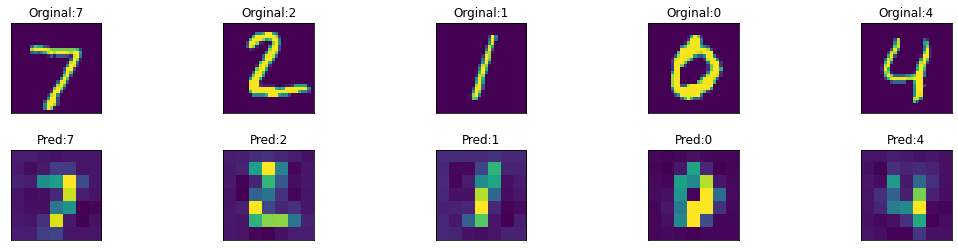

In [7]:
fig, axes = plt.subplots(2,5, figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)
for i in range(5):
  axes[0,i].imshow(x_test[i])
  axes[0,i].get_xaxis().set_visible(False)
  axes[0,i].get_yaxis().set_visible(False)
  axes[0,i].set_title(f'Orginal:{y_test[i]}')


  axes[1,i].imshow(y_pred[i].reshape(28,28))
  axes[1,i].get_xaxis().set_visible(False)
  axes[1,i].get_yaxis().set_visible(False)
  axes[1,i].set_title(f'Pred:{y_test[i]}')